In [31]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

# import libraries
import pandas as pd
from pathlib import Path
import xml.etree.ElementTree
from batterydispatch.environment.System import System
from batterydispatch.environment.Battery import Battery
from batterydispatch.agent.agents import ThresholdAgent, MonteCarloAgent, QAgent
from batterydispatch.agent.policies import do_nothing

# Point a Path object at the GreenButton data
fdir = Path().absolute()
fname = "pge_electric_interval_data_2011-03-06_to_2012-04-06 A10S Med Business Large Usage.xml"
fpath = fdir / "batterydispatch" / "resources" / fname
#fname = "pge_electric_interval_data_2011-03-06_to_2012-04-06 A10S Med Business Heavy Usage.xml"


In [62]:
# Set any policy parameters and choose a policy
TARGET_DEMAND = 8000
agent = ThresholdAgent(TARGET_DEMAND)
battery_power = 1000

# Set up the system
system = System(fpath)
system.bus.add_battery(Battery(capacity=5000, power=battery_power))
system.set_actions(2, 1)
system.actions.options *= battery_power
system.fit_states()
system.set_agent(agent)
system.initialize_A()

In [63]:
system.actions.options

array([-1000.,  -500.,     0.,   500.,  1000.])

In [64]:
# Run first day
system.agent.set_policy(do_nothing)
_, (demand, energy) = system.tariff.calculate_bill(system.run_first_day())
default_reward = demand + energy * 30
default_reward

agent2 = MonteCarloAgent()
system.set_agent(agent2)
system.agent.initialize_state_actions(system.state.list_all_states(), system.actions.options, -1*default_reward)
system.agent.default_SA_estimate = default_reward * -1

system.agent.set_greedy_policy(0.1)
system.agent.learning_rate = 0.1

C:\Users\Administrator\PycharmProjects\BatteryAgent\batterydispatch\environment\helpers.py:27: UserWarning: The value -250.0 given is less than the first value in array [   0.         1666.66666667 3333.33333333 5000.        ]. The min value will be returned.
  val, array))
C:\Users\Administrator\PycharmProjects\BatteryAgent\batterydispatch\environment\helpers.py:27: UserWarning: The value -125.0 given is less than the first value in array [   0.         1666.66666667 3333.33333333 5000.        ]. The min value will be returned.
  val, array))


In [65]:
system.agent.S_A_values

{(0.0, 0.0, 300.0, 4050.0): {-1000.0: -369772.71749999997,
  -500.0: -369772.71749999997,
  0.0: -369771.71749999997,
  500.0: -369772.71749999997,
  1000.0: -369772.71749999997},
 (0.0, 0.0, 300.0, 4689.473684210527): {-1000.0: -369772.71749999997,
  -500.0: -369772.71749999997,
  0.0: -369771.71749999997,
  500.0: -369772.71749999997,
  1000.0: -369772.71749999997},
 (0.0, 0.0, 300.0, 5328.9473684210525): {-1000.0: -369772.71749999997,
  -500.0: -369772.71749999997,
  0.0: -369771.71749999997,
  500.0: -369772.71749999997,
  1000.0: -369772.71749999997},
 (0.0, 0.0, 300.0, 5968.421052631578): {-1000.0: -369772.71749999997,
  -500.0: -369772.71749999997,
  0.0: -369771.71749999997,
  500.0: -369772.71749999997,
  1000.0: -369772.71749999997},
 (0.0, 0.0, 300.0, 6607.894736842105): {-1000.0: -369772.71749999997,
  -500.0: -369772.71749999997,
  0.0: -369771.71749999997,
  500.0: -369772.71749999997,
  1000.0: -369772.71749999997},
 (0.0, 0.0, 300.0, 7247.368421052632): {-1000.0: -36977

In [66]:
system.agent.set_greedy_policy(0.025)



In [67]:
grid_flow = system.run_first_day()

C:\Users\Administrator\PycharmProjects\BatteryAgent\batterydispatch\environment\helpers.py:27: UserWarning: The value -250.0 given is less than the first value in array [   0.         1666.66666667 3333.33333333 5000.        ]. The min value will be returned.
  val, array))
C:\Users\Administrator\PycharmProjects\BatteryAgent\batterydispatch\environment\helpers.py:27: UserWarning: The value -125.0 given is less than the first value in array [   0.         1666.66666667 3333.33333333 5000.        ]. The min value will be returned.
  val, array))


In [68]:
pd.set_option("display.max_rows", 100000)
grid_flow

,duration,start,value,duration_hrs,start_date,battery_action,load,state_of_charge,net_flow,state
652,900,2011-03-13 00:00:00,2700.0,0.25,2011-03-13,0.0,2700.0,0.0,2700.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
653,900,2011-03-13 00:15:00,2700.0,0.25,2011-03-13,0.0,2700.0,0.0,2700.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
654,900,2011-03-13 00:30:00,3000.0,0.25,2011-03-13,0.0,3000.0,0.0,3000.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
655,900,2011-03-13 00:45:00,2700.0,0.25,2011-03-13,0.0,2700.0,0.0,2700.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
656,900,2011-03-13 01:00:00,2400.0,0.25,2011-03-13,0.0,2400.0,0.0,2400.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
657,900,2011-03-13 01:15:00,3000.0,0.25,2011-03-13,0.0,3000.0,0.0,3000.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
658,900,2011-03-13 01:30:00,2700.0,0.25,2011-03-13,0.0,2700.0,0.0,2700.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
659,900,2011-03-13 01:45:00,2400.0,0.25,2011-03-13,0.0,2400.0,0.0,2400.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
660,900,2011-03-13 02:00:00,2700.0,0.25,2011-03-13,0.0,2700.0,0.0,2700.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
661,900,2011-03-13 02:15:00,2700.0,0.25,2011-03-13,0.0,2700.0,0.0,2700.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"


In [69]:
hist = []


In [70]:

from IPython.display import clear_output

i = 0
while True:
    i += 1
    if i > 20:
        i = 0
        clear_output()
    grid_flow = system.run_first_day()
    peak_shave = max(grid_flow.load) - max(grid_flow.net_flow)
    demand = system.tariff.calculate_demand_charge(grid_flow, 'net_flow')
    energy = system.tariff.calculate_energy_charge(grid_flow, 'net_flow')
    orig_demand = system.tariff.calculate_demand_charge(grid_flow, 'load')
    orig_energy = system.tariff.calculate_energy_charge(grid_flow, 'load')
    
    reward = demand + energy * 30
    savings = orig_demand + orig_energy * 30 - reward
    print("Original demand: {}, new demand:{}, total reward: {}, savings: {}".format(max(grid_flow.load), max(grid_flow.net_flow), reward, savings))
    print("    final state: {}".format(system.state.as_tuple()))
    hist.append((peak_shave, reward, savings))
    if max(grid_flow.load) > max(grid_flow.net_flow):
        print("BOOM")
        #break

Original demand: 4500.0, new demand:4200.0, total reward: 361021.8675, savings: 8750.849999999977
    final state: (20.0, 0.0, 2810.5263157894738, 4689.473684210527)
BOOM
Original demand: 4500.0, new demand:4200.0, total reward: 361127.09249999997, savings: 8645.625
    final state: (20.0, 0.0, 2810.5263157894738, 4689.473684210527)
BOOM
Original demand: 4500.0, new demand:4200.0, total reward: 361021.8675, savings: 8750.849999999977
    final state: (20.0, 0.0, 2810.5263157894738, 4689.473684210527)
BOOM
Original demand: 4500.0, new demand:4200.0, total reward: 361021.8675, savings: 8750.849999999977
    final state: (20.0, 0.0, 2810.5263157894738, 4689.473684210527)
BOOM
Original demand: 4500.0, new demand:4200.0, total reward: 361021.8675, savings: 8750.849999999977
    final state: (20.0, 0.0, 2810.5263157894738, 4689.473684210527)
BOOM
Original demand: 4500.0, new demand:4200.0, total reward: 361021.8675, savings: 8750.849999999977
    final state: (20.0, 0.0, 2810.5263157894738, 

KeyboardInterrupt: 

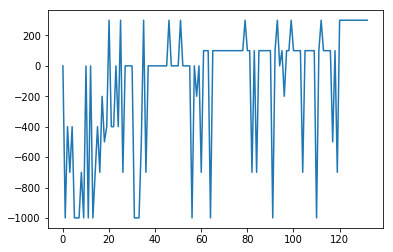

In [76]:
from matplotlib import pyplot as plt
hist2 = [h[0] for h in hist]
plt.plot(hist2)
plt.show()

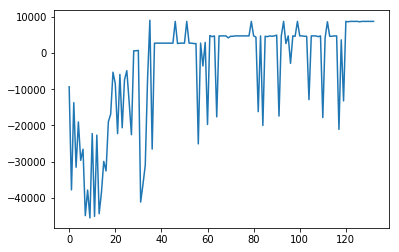

In [77]:
from matplotlib import pyplot as plt
hist2 = [h[2] for h in hist]
plt.plot(hist2)
plt.show()

In [44]:
pd.set_option("display.max_rows", 100000)
grid_flow

,duration,start,value,duration_hrs,start_date,battery_action,load,state_of_charge,net_flow,state
652,900,2011-03-13 00:00:00,2700.0,0.25,2011-03-13,-500.0,2700.0,125.0,3200.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
653,900,2011-03-13 00:15:00,2700.0,0.25,2011-03-13,-500.0,2700.0,250.0,3200.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
654,900,2011-03-13 00:30:00,3000.0,0.25,2011-03-13,1000.0,3000.0,0.0,2000.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
655,900,2011-03-13 00:45:00,2700.0,0.25,2011-03-13,-500.0,2700.0,125.0,3200.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
656,900,2011-03-13 01:00:00,2400.0,0.25,2011-03-13,-500.0,2400.0,250.0,2900.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
657,900,2011-03-13 01:15:00,3000.0,0.25,2011-03-13,1000.0,3000.0,0.0,2000.0,"(0.0, 0.0, 3647.368421052631, 4050.0)"
658,900,2011-03-13 01:30:00,2700.0,0.25,2011-03-13,-500.0,2700.0,125.0,3200.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
659,900,2011-03-13 01:45:00,2400.0,0.25,2011-03-13,-500.0,2400.0,250.0,2900.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
660,900,2011-03-13 02:00:00,2700.0,0.25,2011-03-13,-500.0,2700.0,375.0,3200.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"
661,900,2011-03-13 02:15:00,2700.0,0.25,2011-03-13,-500.0,2700.0,500.0,3200.0,"(0.0, 0.0, 2810.5263157894738, 4050.0)"


In [ ]:
grid_flow.loc[14560]['state']

In [ ]:
system.agent.S_A_values[(20.0, 0.0, 14526.315789473685, 10444.736842105263)]

In [ ]:
system.agent.S_A_values

In [ ]:
system.tariff.calculate_energy_charge(grid_flow, 'load')

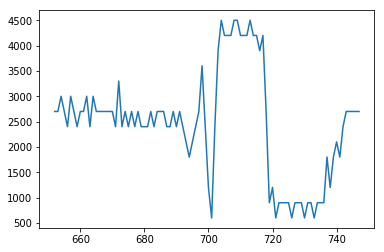

In [42]:
plt.plot(grid_flow.load)
plt.show()

In [ ]:
system.state.S_demand

In [ ]:
grid_flow